# Домашнее задание 7

**Note:** использовать `sns` не запрещено (он может сильно упростить жизнь), но все примеры сделаны через `mpl`.

Перед отправкой задания обязательно нажмите `Restart Kernel and Run All Cells`, чтобы убедиться, что весь код последовательно запускается без ошибок. Если после ячейки что-то не выведено - задача не засчитывается (и все последующие).

Сначала пробегитесь по всем заданиям. Возможно кто-то найдет для себя более полезным начать со второй части (раздел с материалами к ознакомлению), но обратите особое внимание на задачу 1 первой части. :)

## Правила оценивания.

В этом задании правильное выполнение Части 1 оценивается в 3.4 балла из 5, но так как оценка округляется по правилам математики, то для оценки 4 надо хоть что-то выполнить (помимо создания датафреймов) из Части 2. Все инструкции вы встретите по ходу ноутбука.

Если какие-то из визуализаций будут некачественными, то вас попросят их поправить.

В части 2 также оценивается оформление (разбиение на разделы, **выводы** по графикам).

## Часть 1. Разминка.

В этой части важно подписывать у графиков оси, не забывать названия и указывать легенду там, где это нужно. Конечно, так лучше делать всегда, но понятно, что если вы делаете какое-то исследование (в особенности для себя), часто мы позволяем себе опускать такие важные части оформления графиков. Тем не менее если речь идет о статье или презентации, то грамотное оформление графика обязательно.

### Задача 1.

**Note:** задача про изменение глобальных настроек.

В этой задаче вам нужно изменить некоторые глобальные настройки через `rcParams` ([здесь](https://matplotlib.org/stable/users/explain/customizing.html#the-default-matplotlibrc-file) список названий настроек, например, размер фигуры можно задать так: `mlp.rcParams["figure.figsize"] = (16, 9)`). Начать можно со шрифта - выберите свой (отличный от дефолтного!).

В случае, если вы будете использовать `sns` (либо как основной, либо как дополнительный), то в этой же ячейке поменяйте и его настройки, но помните, что они могут перезаписывать друг друга (`sns` - обертка над `mpl`)

Возможно задачу стоит постепенно выполнять по мере продвижения по ноутбуку, возвращаясь к этой ячейке, но проверяйте, что уже сделанные визуализации "не поплыли".

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['font.family'] = 'DejaVu Sans Mono'

In [2]:
import os

### Подготовка

Это будут два датасета о качестве красного и белого вина. Возможно в последующих задачах вам будет удобнее переходить к нампаевским массивам.

In [3]:
#####################################################
##### Пока можно особо не вникать что происходит ниже
##### но обратите внимание на категории
#####################################################

import pandas as pd
import numpy as np

# можно читать файлы сразу по ссылке в интернете
white = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
red = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
white_wine = pd.read_csv(white, sep=';')
red_wine = pd.read_csv(red, sep=';')

# будем хранить тип вина как атрибут
red_wine['wine_type'] = 'red'   
white_wine['wine_type'] = 'white'

# Сделаем оценку качества вина менее гранулярной
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low' 
                                                          if value <= 5 else 'medium' 
                                                              if value <= 7 else 'high')
red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'], 
                                           categories=['low', 'medium', 'high'])
white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low' 
                                                              if value <= 5 else 'medium' 
                                                                  if value <= 7 else 'high')
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'], 
                                             categories=['low', 'medium', 'high'])

# Соединим наборы данных по красному и белому вину
wines = pd.concat([red_wine, white_wine])

# Просто перемешаем данные
wines = wines.sample(frac=1, random_state=42).reset_index(drop=True)

wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.0,0.17,0.74,12.80,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,white,high
1,7.7,0.64,0.21,2.20,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,red,low
2,6.8,0.39,0.34,7.40,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,white,medium
3,6.3,0.28,0.47,11.20,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,white,medium
4,7.4,0.35,0.20,13.90,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,white,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,7.6,0.32,0.58,16.75,0.050,43.0,163.0,0.99990,3.15,0.54,9.2,5,white,low
6493,5.6,0.28,0.27,3.90,0.043,52.0,158.0,0.99202,3.35,0.44,10.7,7,white,medium
6494,6.4,0.37,0.20,5.60,0.117,61.0,183.0,0.99459,3.24,0.43,9.5,5,white,low
6495,6.5,0.26,0.50,8.00,0.051,46.0,197.0,0.99536,3.18,0.47,9.5,5,white,low


### Задача 2

Постройте гистограммы плотности красного и белого. Желательно на одном графике, но гистограммы должны быть отличимы. Вам может помочь прозрачность и их покраска в разные цвета.

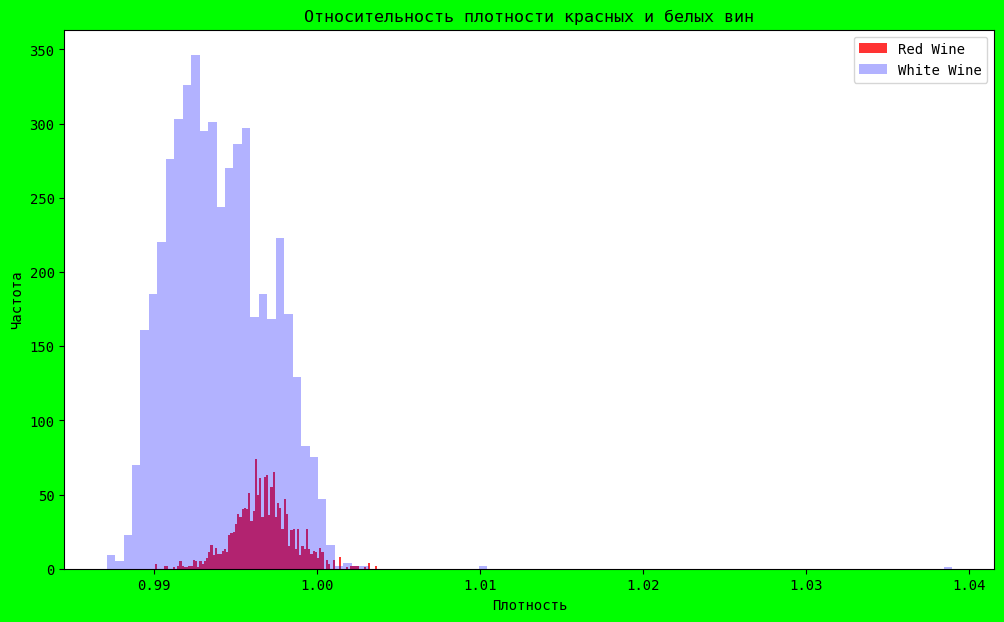

In [4]:
red_wine = wines[wines['wine_type'] == 'red']
white_wine = wines[wines['wine_type'] == 'white']

plt.figure(figsize=(12, 7), facecolor='lime')
plt.hist(red_wine['density'], bins=100, alpha=0.8, label='Red Wine', color='red')
plt.hist(white_wine['density'], bins=100, alpha=0.3, label='White Wine', color='blue')
plt.xlabel('Плотность')
plt.ylabel('Частота')
plt.title('Относительность плотности красных и белых вин')
plt.legend()
plt.show()

### Задача 3

Постройте столбчатую диаграмму столбца `quality_label` (кол-во вина каждого качества)

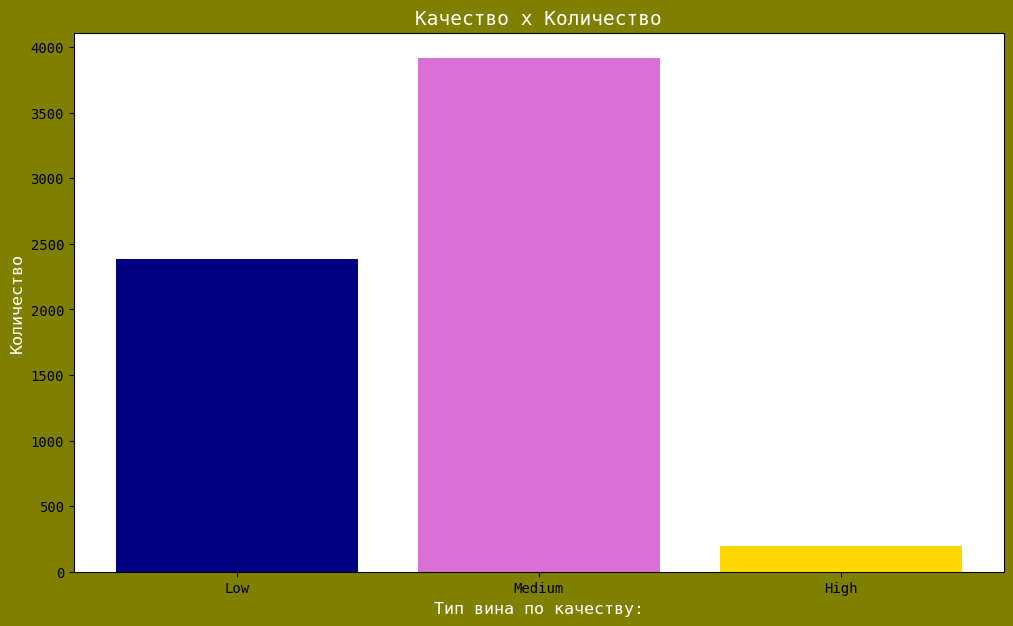

In [5]:
call_m = wines[wines['quality_label'] == 'medium']
call_l = wines[wines['quality_label'] == 'low']
call_h = wines[wines['quality_label'] == 'high']

labels = ['Low', 'Medium', 'High']
counts = [len(call_l), len(call_m), len(call_h)]

plt.figure(figsize=(12, 7), facecolor='olive')
plt.bar(labels, counts, color=['navy', 'orchid', 'gold'])
plt.xlabel('Тип вина по качеству:', fontsize=12, color='white')
plt.ylabel('Количество', fontsize=12, color='white')
plt.title('Качество х Количество', fontsize=14, color='white')
plt.xticks(rotation=0)
plt.show()

### Задача 4

Постройте на сетке размера 2 на 2 (сетку создайте удобным для вас способом) гистограммы признаков `fixed acidity`,	`volatile acidity`,	`citric acid`,	`residual sugar` в разбиении по белому и красному вину.

Не забудьте про оформление. Гистограммы должны быть различимы, чтобы их можно было прочитать, например, можно воспользоваться прозрачностью или смещением (как в примере следующей задачи).

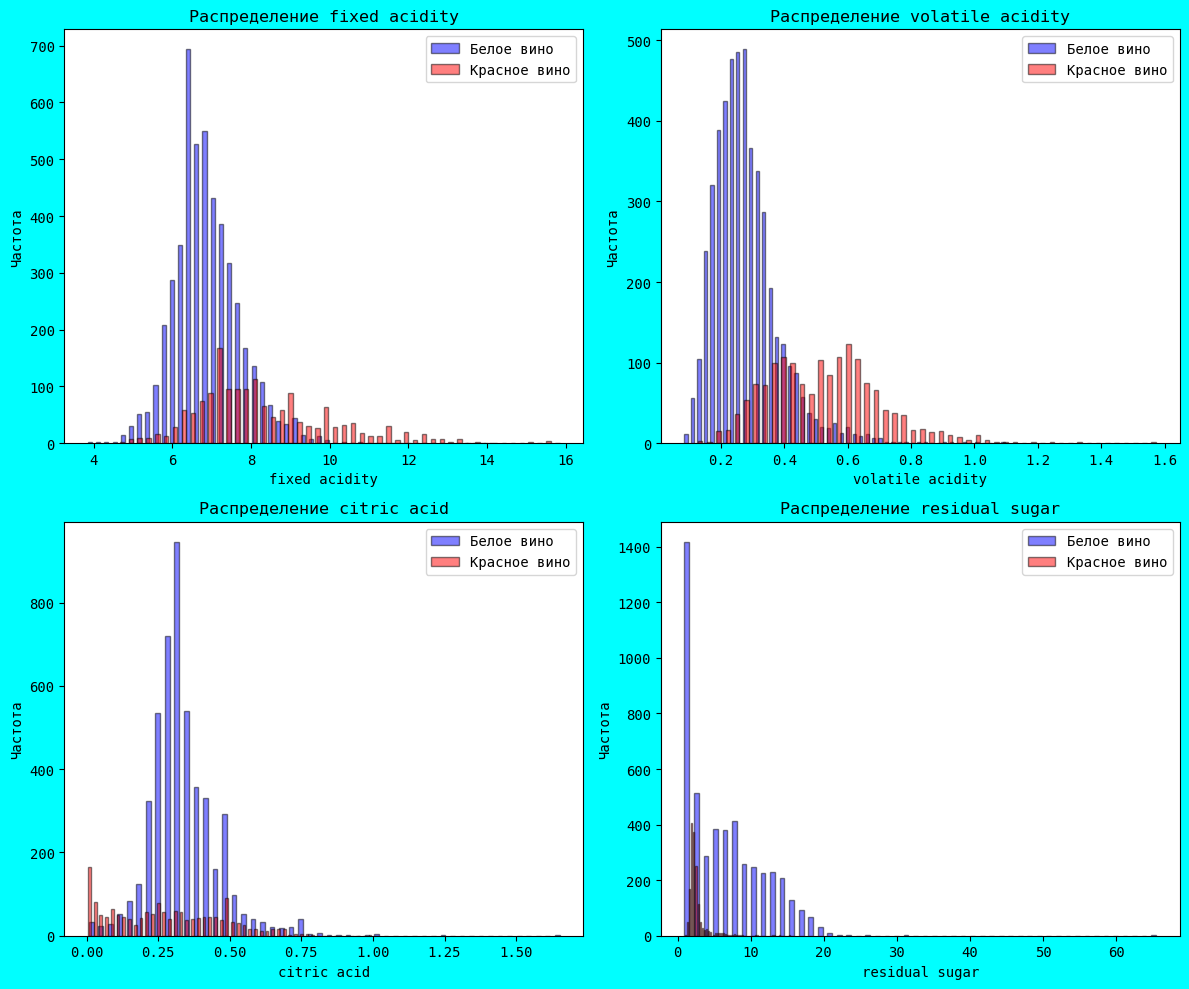

In [6]:
white_wine = wines[wines['wine_type'] == 'white']
red_wine = wines[wines['wine_type'] == 'red']

fig, axs = plt.subplots(2, 2, figsize=(12, 10), facecolor='cyan')
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar']
for i, feature in enumerate(features):
    row = i // 2
    col = i % 2
    axs[row, col].hist(white_wine[feature], bins=50, alpha=0.5, label='Белое вино', color='blue', edgecolor='black', rwidth=0.5)
    axs[row, col].hist(red_wine[feature], bins=50, alpha=0.5, label='Красное вино', color='red', edgecolor='black', rwidth=0.5)
    axs[row, col].set_title(f'Распределение {feature}')
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel('Частота')
    axs[row, col].legend()

plt.tight_layout()
plt.show()

In [7]:
# пример

### Задача 5

Отобразите scatter plot, на котором будет отражена информация по 4-м признакам: fixed acidiy, alcohol, residual sugar и wine_type (переводы в заголовке примера ниже).

График двумерный (т.е в плоскости), но вы можете пользоваться чем-то из этого списка. Смотрите сами, что будет более уместным:


*   Размером точек
*   Цветом точек
*   Цветом границ точек
*   Формой точки (круг, крест, квадрат...)
*   и т.д.

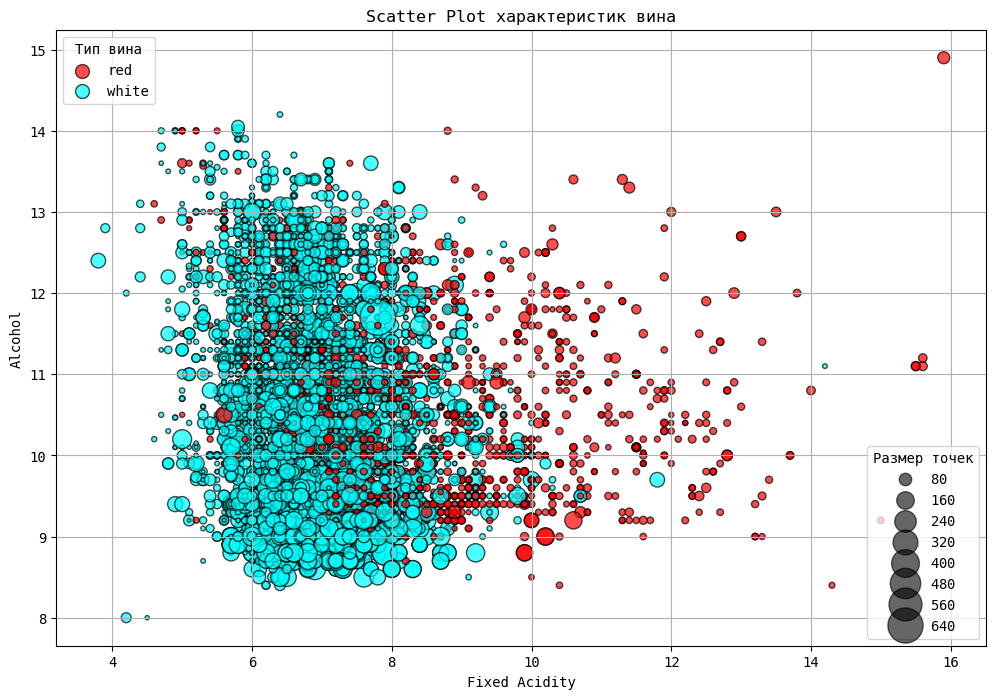

In [8]:
plt.figure(figsize=(12, 8))

colors = {'red': 'red', 'white': 'cyan'}
sizes = wines['residual sugar'] * 10  # Размер точек пропорционален значению остаточного сахара

scatter = plt.scatter(wines['fixed acidity'], wines['alcohol'], c=wines['wine_type'].map(colors), s=sizes, edgecolor='black', alpha=0.7)

#Загол и метки
plt.title('Scatter Plot характеристик вина')
plt.xlabel('Fixed Acidity')
plt.ylabel('Alcohol')
plt.grid(True)

#Лег
for wine_type in colors:
    plt.scatter([], [], c=colors[wine_type], alpha=0.7, s=100, edgecolor='black', label=wine_type)
plt.legend(title='Wine Type')

#Лег размер точек
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
legend2 = plt.legend(handles, labels, loc="lower right", title="Размер точек")
plt.gca().add_artist(legend2)

plt.legend(title='Тип вина', loc='upper left')

plt.show()

Ниже приведен пример "хорошего" (на котором читаются все 4 признака) графика.

In [9]:
# пример

## Часть 2. Скажи мне, на что ты тратишь деньги, и я скажу тебе, кто ты.

Анализ банковских транзакций от Сбера (на тот момент Сбербанка).

Ссылка на соревнование: https://ods.ai/competitions/sberbank-sirius-lesson

**Upd:** с вечера 29.07 страница с самим соревнованием пятисотит :( Тем не менее вся необходимая нам информация о данных находится в описании ниже.

### Введение

<img align=right src="https://storage.yandexcloud.net/datasouls-competitions/sirius/pic/1_2.png" style="width:500px;" />

Глобально вопрос звучит так: можно ли узнать возраст клиента на основе информации о его расходах по карте?

Сбербанк подготовил задачу на базе реальных банковских транзакций. 

Совершенствуя свои продукты, банк использует информацию о пользователях, в том числе и возраст. Это помогает сделать персонализированные продукты, которые удовлетворяют реальным потребностям клиентов.

**В этом задании вам предстоит определить, есть ли разница в характере и типах трат между клиентами банка разных возрастов.**



### Исследовательский анализ данных (EDA)

Ваша задача — исследовать информацию о расходах клиента банка и выяснить, по какой информации из транзакций - сумма транзакции, время транзакции, категория трат транзакиции или что-то еще - можно отличить клиентов банка разных возрастных категорий. Для этого вам нужно провести исследовательский анализ данных и выяснить, в чем же заключаются различия между тратами с карты у людей разного возраста.

### Данные

<img align=right src="https://storage.yandexcloud.net/datasouls-competitions/sirius/pic/1_5.png" style="width:500px;" />


Для решения задачи вам предоставляется информация о транзакциях клиентов банка - примерно 27М записей.

Каждая запись описывает одну банковскую транзакцию.

Вам предоставлен (набор данных) `transactions_train.csv`, в котором для каждой транзакции известна дата, сумма, тип и id клиента:

- `сlient_id` – уникальный номер клиента;
- `trans_date` – дата транзакции (представляет из себя просто номер дня в хронологическом порядке, начиная от заданной даты);
- `small_group` – группа транзакций, характеризующих тип транзакции (например, продуктовые магазины, одежда, заправки, детские товары и т.п.);
- `amount_rur` – сумма транзакции (для анонимизации данные суммы были трансформированы без потери структуры).

**Note:** хоть файл и называется train, в этом задании вам ничего обучать не придется. Нам просто нужны данные. Вы можете прочитать задание самого соревнования, но следовать надо инструкциям этого ноутбука.

В файле `train_target.csv` содержится информация о Клиенте и метка возрастной группы, к которой он относится:

- `client_id` – уникальный номер Клиента (соответствует `client_id` из файла `transactions_train.csv`);
- `bins` – метка (от 0 до 3) одной из 4-х возрастных групп. 

Файлы `test.csv` и `transactions_test.csv` для выполнения задания не нужны.

Вам также предоставлен информационный файл `small_group_description.csv`, который содержит расшифровку типов транзакций.

### Рекомендуемые материалы к ознакомлению

Презентация с графиками и кодом отличного исследовательского анализа данных (с аналогичного соревнования 2016 года от Сбера, но целевой меткой был пол) от одного из ведущих российских экспертов в области анализа данных Александра Дьяконова:

- пост с кодом: https://dyakonov.org/2016/10/14/data-science-contest-сбербанка/
- презентация из поста графика: https://alexanderdyakonov.files.wordpress.com/2016/10/dj2016_sdsj_vis.pdf

Презентация по ссылке выше крайне рекомендуется к ознакомлению. Так вы лучше поймете, какие зависимости/срезы/графики можно и нужно строить вам.

### (Раздел со звездочкой)

Вы не ограничены в том, чтобы провести более глубокий анализ на ваше усмотрение.

### Скачиваем данные


### Исследовательский анализ данных (EDA - Exploratory Data Analysis)

Далее вам нужно с помощью визуализации (`matplotlib` или `seaborn` - на ваше усмотрение) провести сам анализ. Оформляйте ноутбук и сами графики правильно (текстовые ячейки, подписи на осях, легенды, etc)

Примерный набор вопросов, на которые стоит ответить с помощью анализа данных:

- как меняется число и сумма странзакций в разных возрастных категориях клиентов по дням месяца, по дням недели, по часам в дне?
- какая средняя сумма трат по возрастным группам за месяц?
- есть ли разница в среднем размере снимаемой в банкомате сумме для разных возрастных групп?
- какие самые частые по числу транзакций и самые большие по сумме покупок категории трат (```mcc_code```) для разных возрастных групп?
- есть ли характерные категории трат для разных возрастных групп?

Это лишь примерый список вопросов. Вы можете провести гораздо более широкий исследовательский анализ данных (идеи можно черпать из презентации А. Дьяконова)

Но сначала выполните небольшую подготовку:

In [3]:
import pandas as pd
from pathlib import Path
import os

Создайте путь к директории `data` и выведите список содержимого:

https://docs.python.org/3/library/pathlib.html

In [4]:
os.chdir('data2')

Создайте датафрейм `df_transactions` с транзакциями и выведите первые несколько строк:

In [5]:
df_transactions = pd.read_csv('transactions_train.csv')

In [6]:
df_transactions.head(5)

,client_id,trans_date,small_group,amount_rur
0,33172,6,4,71.463
1,33172,6,35,45.017
2,33172,8,11,13.887
3,33172,9,11,15.983
4,33172,10,11,21.341


Сколько строчек в датафрейме и какой размер памяти он занимает (напишите код и впишите ответ в текстовую ячейку ниже):

In [7]:
df_transactions.shape[0]

26450577

**Ответ:** 26450577

Считайте файл `train_target.csv` с возрастными группами юзеров (назовите датафрейм `df_target`). Выведите информацию по нему:

In [8]:
df_target = pd.read_csv('train_target.csv')

Объедините (`df.merge`) две таблицы по ключу `client_id`. То есть склейте их по заданному ключу - к каждой строке из левой таблицы добавьте все значения, которые соответствуют этому ключу из правой таблицы. Новый датафрейм назовите `df_merged`. Не забудьте посмотреть информацию по нему.

**Note:** аналогом этой операции в SQL является JOIN.

In [9]:
df_merge = pd.merge(df_transactions, df_target, on='client_id', how='inner')

In [10]:
df_merge.head(5)

,client_id,trans_date,small_group,amount_rur,bins
0,33172,6,4,71.463,0
1,33172,6,35,45.017,0
2,33172,8,11,13.887,0
3,33172,9,11,15.983,0
4,33172,10,11,21.341,0


Дальше все в ваших руках! Исследуйте! (помните об оформлении)

## Есть ли характерные категории трат для разных возрастных групп?
     Далее топ затрат, распространенный на все группы:
1. Группы 0, 1, 2 и 3 тратятся больше всего на продукты (1).
  2. На втором месте по тратам у групп 0, 3, 2 стоят фастфуд и кафешки (11), у 1 группы оплата телефона и связи (3)
  3. На третьем месте по тратам у групп 0, 3, 2 стоит оплата связи (3), у 1 группы фастфуд (11)
  4. На четвертом месте у всех оплата метро и тд (25).


 * Разница начинается с трат на аптеку (4). 1 Группа тратит больше всех, 2 же меньше всех
 * На такси (12) тратят в основном группа 2 и 0, вообще же не тратят 1 и 3
 * На обслуживание авто (2) - не тратит деньги 2 группа вообще

In [11]:
small_group = pd.read_csv('small_group_description.csv')

In [21]:
small_group.iloc[150:200]

,small_group,small_group_code
150,Антиквариат,150
151,Строительные подрядчики,151
152,Услуги химчистки (ковры),152
153,Велоспорт (покупка велосипеда или комплектующих),153
154,Автодилеры (мотоциклы),154
155,Бассейны,155
156,Электромонтажные работы и оборудование (свет),156
157,Электромонтажные работы и оборудование (сигнал...,157
158,Похоронные услуги,158
159,Кемпинг (оборудование),159


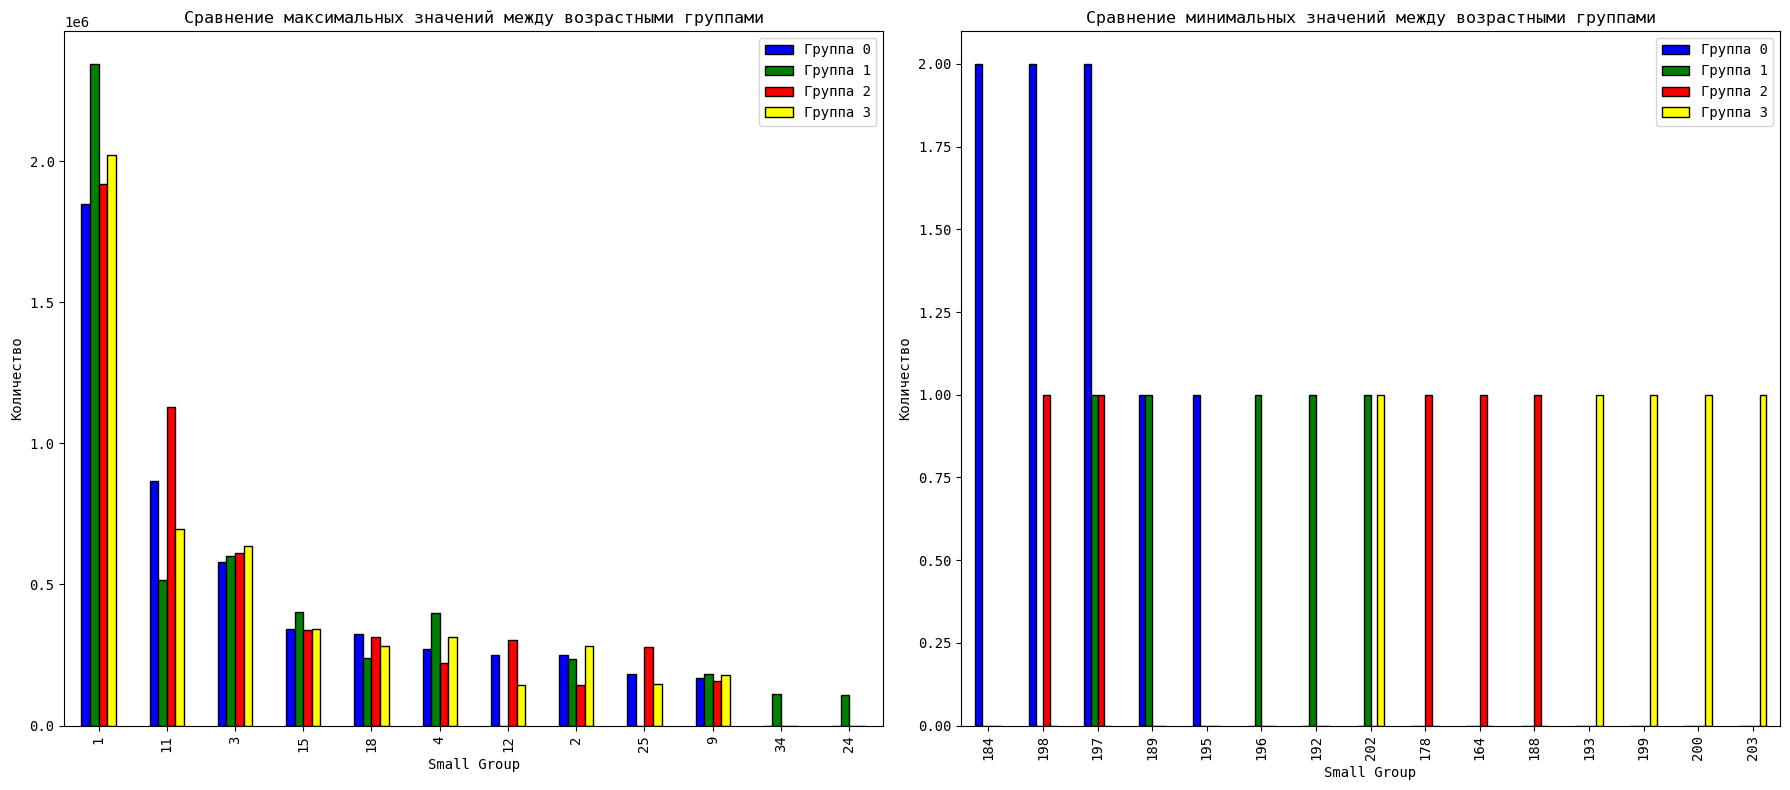

In [18]:
def get_max_min(df, bin_value):
    filtered_df = df[df['bins'] == bin_value]
    group_counts = filtered_df['small_group'].value_counts()
    max_pok = group_counts.head(10)
    min_pok = group_counts.tail(5)
    return max_pok, min_pok


max_pok_0, min_pok_0 = get_max_min(df_merge, 0)
max_pok_1, min_pok_1 = get_max_min(df_merge, 1)
max_pok_2, min_pok_2 = get_max_min(df_merge, 2)
max_pok_3, min_pok_3 = get_max_min(df_merge, 3)

max_combined = pd.concat([max_pok_0, max_pok_1, max_pok_2, max_pok_3], axis=1)
max_combined.columns = ['Группа 0', 'Группа 1', 'Группа 2', 'Группа 3']

min_combined = pd.concat([min_pok_0, min_pok_1, min_pok_2, min_pok_3], axis=1)
min_combined.columns = ['Группа 0', 'Группа 1', 'Группа 2', 'Группа 3']

fig, axs = plt.subplots(1, 2, figsize=(18, 8))

max_combined.plot(kind='bar', ax=axs[0], color=['blue', 'green', 'red', 'yellow'], edgecolor='black')
axs[0].set_title('Сравнение максимальных значений между возрастными группами')
axs[0].set_xlabel('Small Group')
axs[0].set_ylabel('Количество')
axs[0].legend()

min_combined.plot(kind='bar', ax=axs[1], color=['blue', 'green', 'red', 'yellow'], edgecolor='black')
axs[1].set_title('Сравнение минимальных значений между возрастными группами')
axs[1].set_xlabel('Small Group')
axs[1].set_ylabel('Количество')
axs[1].legend()

plt.tight_layout()
plt.show()

## Какая средняя сумма трат по возрастным группам за месяц?

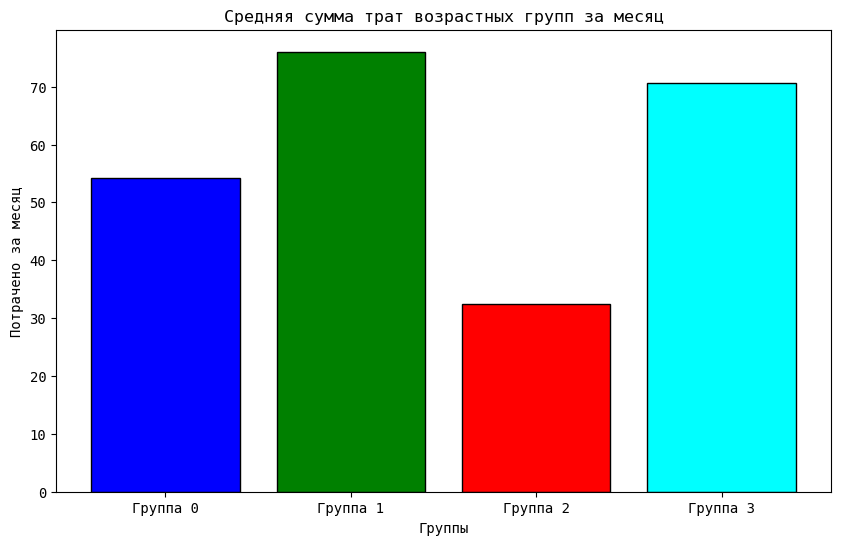

In [19]:
def get_summ_per_month(df, bin_value):
    filtered_df = df[(df['bins'] == bin_value) & (df['trans_date'] >= 1) & (df['trans_date'] <= 31)]
    df_counts = filtered_df['amount_rur'].mean()
    return df_counts

mean_summ_0 = get_summ_per_month(df_merge, 0)
mean_summ_1 = get_summ_per_month(df_merge, 1)
mean_summ_2 = get_summ_per_month(df_merge, 2)
mean_summ_3 = get_summ_per_month(df_merge, 3)

sums = [mean_summ_0, mean_summ_1, mean_summ_2, mean_summ_3]
groups = ['Группа 0', 'Группа 1', 'Группа 2', 'Группа 3']

plt.figure(figsize=(10, 6))
plt.bar(groups, sums, color=['blue', 'green', 'red', 'cyan'], edgecolor='black')
plt.xlabel('Группы')
plt.ylabel('Потрачено за месяц')
plt.title('Средняя сумма трат возрастных групп за месяц')
plt.show()

In [20]:
df_merge[(df_merge['bins'] == 2) & (df_merge['trans_date'] >= 1) & (df_merge['trans_date'] <= 31)]['amount_rur'].sum()

5656352.796

## Какой юзер больше всех потратил бабла за все время и на что?
* Юзер 45079 потратил больше всего денег на размещение рекламы (44)
* Юзер 24166 потратил больше всего на одежду (24)
* Юзеру 15888 вообще нельзя давать деньги, иначе тот просадит их в казино (109)

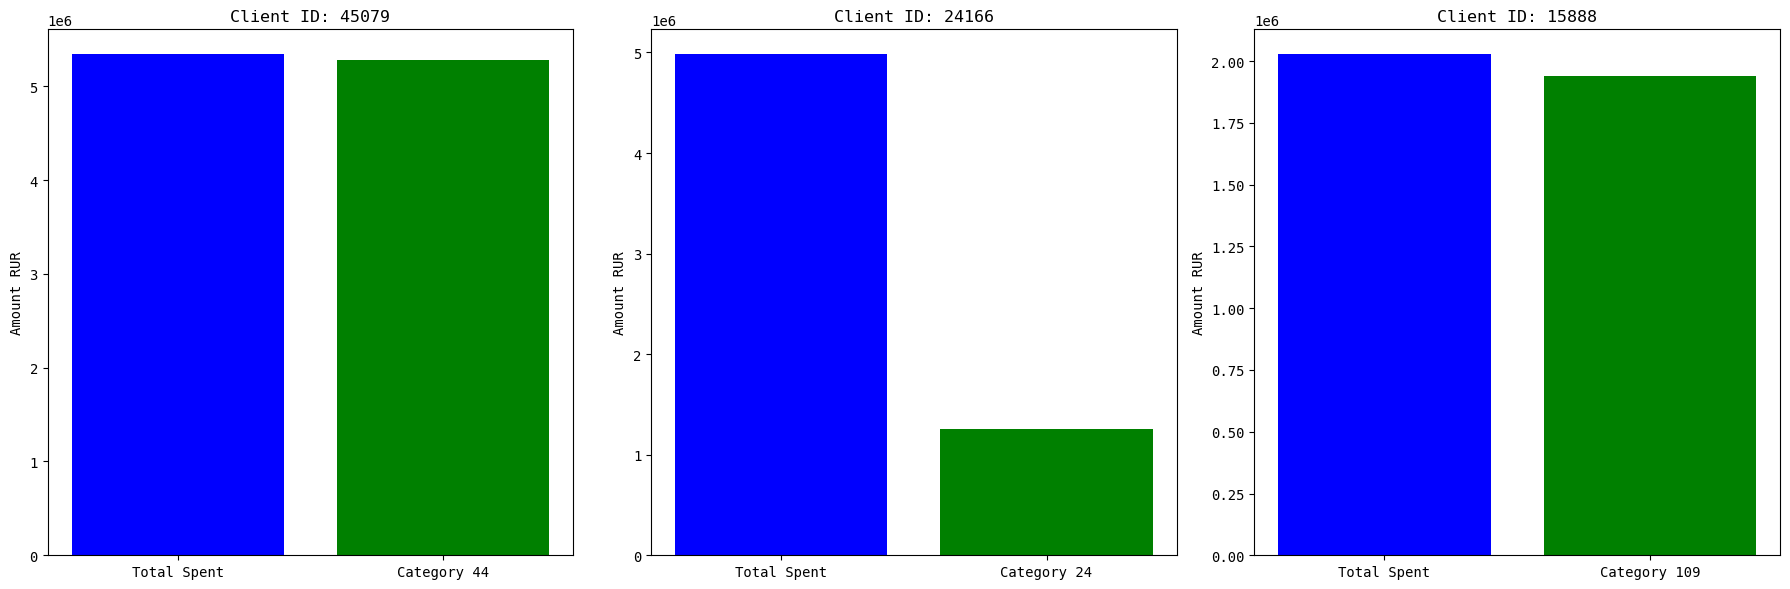

In [21]:
total_spent_per_user = df_merge.groupby('client_id')['amount_rur'].sum()

top_3_spenders = total_spent_per_user.nlargest(3)

top_spenders_info = []

for client_id in top_3_spenders.index:
    max_spender_transactions = df_merge[df_merge['client_id'] == client_id]
    total_spent_per_category = max_spender_transactions.groupby('small_group')['amount_rur'].sum()
    max_spent_category = total_spent_per_category.idxmax()
    max_spent_category_amount = total_spent_per_category.max()
    
    top_spenders_info.append({
        'client_id': client_id,
        'total_spent': top_3_spenders[client_id],
        'max_spent_category': max_spent_category,
        'max_spent_category_amount': max_spent_category_amount
    })

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for i, spender_info in enumerate(top_spenders_info):
    categories = ['Total Spent', f'Category {spender_info["max_spent_category"]}']
    values = [spender_info['total_spent'], spender_info['max_spent_category_amount']]
    
    axs[i].bar(categories, values, color=['blue', 'green'])
    axs[i].set_title(f'Client ID: {spender_info["client_id"]}')
    axs[i].set_ylabel('Amount RUR')

plt.tight_layout()
plt.show()

In [22]:
df_merge.head(5)

,client_id,trans_date,small_group,amount_rur,bins
0,33172,6,4,71.463,0
1,33172,6,35,45.017,0
2,33172,8,11,13.887,0
3,33172,9,11,15.983,0
4,33172,10,11,21.341,0


## Кто (какой client_id) чаще всего проводил транзакции за 1 день, в какой trans_date это было, сколько всего он денег перевел, на что (small_group) и к какой возрастной группе он относится?

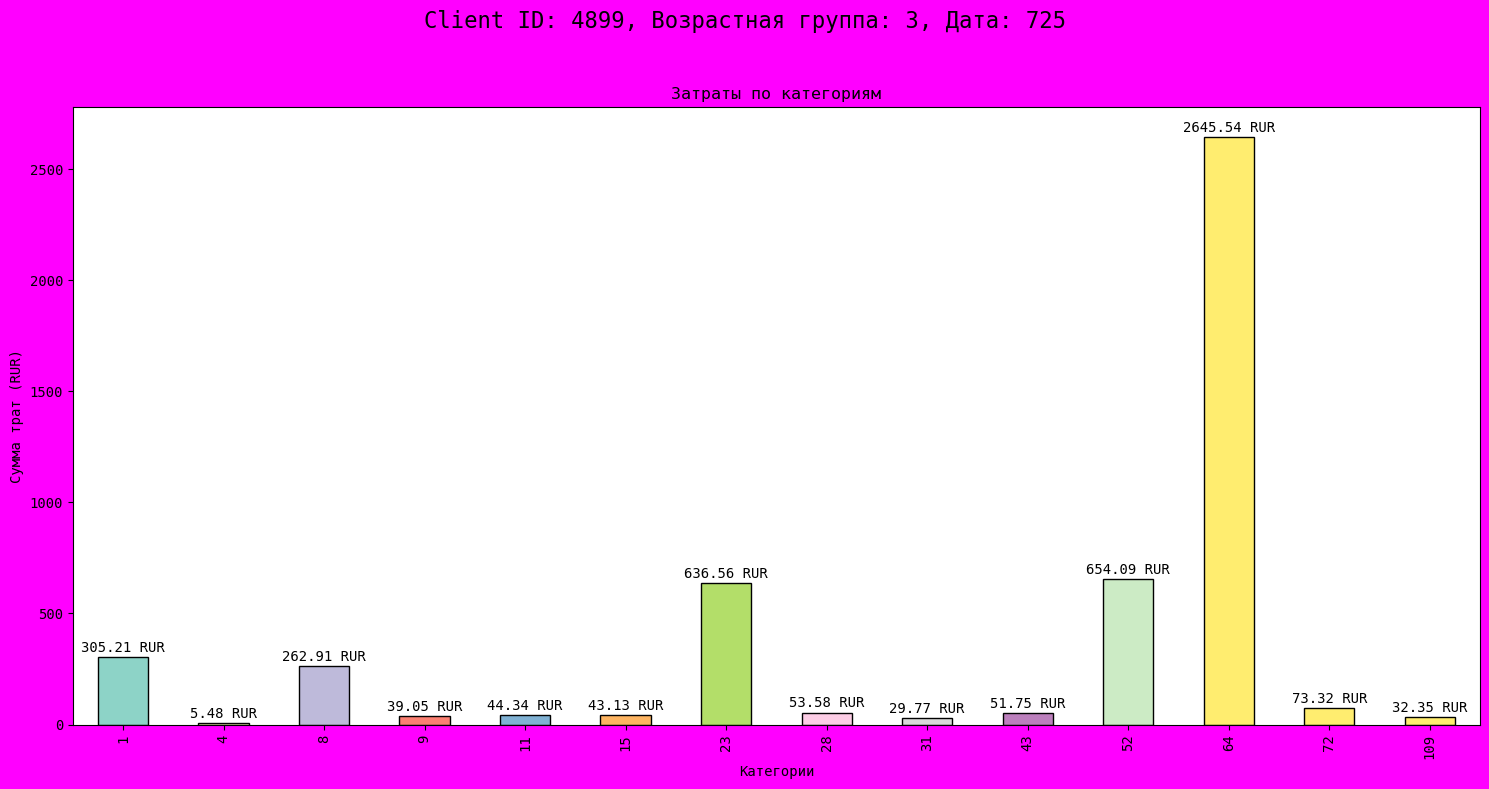

In [23]:
import numpy as np

transactions_per_day = df_merge.groupby(['client_id', 'trans_date']).size().reset_index(name='transaction_count')

max_transactions = transactions_per_day.loc[transactions_per_day['transaction_count'].idxmax()]

max_client_id = max_transactions['client_id']
max_trans_date = max_transactions['trans_date']
max_transaction_count = max_transactions['transaction_count']

filtered_df = df_merge[(df_merge['client_id'] == max_client_id) & (df_merge['trans_date'] == max_trans_date)]

total_amount = filtered_df['amount_rur'].sum()

total_spent_per_category = filtered_df.groupby('small_group')['amount_rur'].sum()
max_spent_category = total_spent_per_category.idxmax()
max_spent_amount = total_spent_per_category.max()

age_group = df_merge[df_merge['client_id'] == max_client_id]['bins'].iloc[0]



fig, ax = plt.subplots(figsize=(15, 8), facecolor='fuchsia')

bars = total_spent_per_category.plot(kind='bar', ax=ax, color=plt.cm.Set3(np.arange(len(total_spent_per_category))), edgecolor='black')

for bar in bars.patches:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 10, f'{bar.get_height():.2f} RUR', ha='center', va='bottom', fontsize=10, color='black')

ax.set_title('Затраты по категориям')
ax.set_xlabel('Категории')
ax.set_ylabel('Сумма трат (RUR)')

plt.suptitle(f'Client ID: {max_client_id}, Возрастная группа: {age_group}, Дата: {max_trans_date}', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [24]:
df_group = pd.read_csv('small_group_description.csv')

In [25]:
df_group.iloc[23]

small_group         Обувь
small_group_code       23
Name: 23, dtype: object

Перед отправкой задания обязательно нажмите `Restart Kernel and Run All Cells`, чтобы убедиться, что весь код последовательно запускается без ошибок.